### Monitoring Graph Templates

This is the primary graph(s) which will display a live view of measurable quantities.

There will be several graphs to represent controlled quantities.

1. Temperature vs Time graph to represent the temperature of the sample carrier and the temperature of the sample itself
2. Current vs time graph to represent the amount of current going into the resistive heater
3. Voltage vs time graph to represent the voltage placed accrossed a peltier cooler
4. Voltage vs time graph to represent the potential placed accross the sample

In the future the graphs for the resistive heater and peltier cooler should be combined by both plotting watts over time.

The voltage vs time graph of the potential accross the sample may be replaced by an electric field accross the sample? Potential is easier to work with for now though and on the graphing side not much would change.

In [14]:
# imports
import collections

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# this is just used to generate mock live data
import psutil

In [15]:
# define data storing deque
# a deque is kind of like a fixed length list
# values added to the end shove values
# from the front away
cpu = collections.deque(np.zeros(10))
print(f"CPU: {cpu}")

CPU: deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


In [16]:
# create a function to update the deque
def update_deque():
    cpu.popleft()
    cpu.append(psutil.cpu_percent(interval=1))

# function test
update_deque()
print(f"CPU: {cpu}")

KeyboardInterrupt: 

/var/folders/5d/bvscdv6j3d71wbxsvd8zwbs80000gn/T/ipykernel_5178/1909581475.py:25: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update_figure, interval=100)


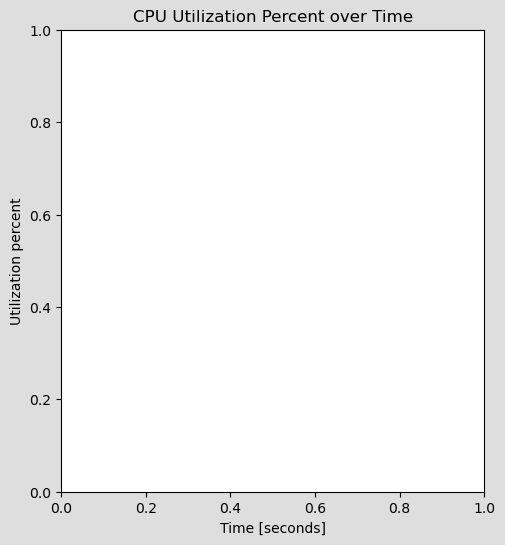

KeyboardInterrupt: 

In [ ]:
# create the figure and define a function to update the figure
fig = plt.figure(figsize=(12,6), facecolor="#DEDEDE")

ax = plt.subplot(121)
ax.set_title("CPU Utilization Percent over Time")
ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Utilization percent")


# update function
def update_figure():
    # update the deque
    update_deque()

    # clear axis
    ax.cla()

    # plot cpu data
    ax.plot(cpu)
    ax.scatter(len(cpu)-1, cpu[-1])
    ax.text(len(cpu)-1, cpu[-1]+2, "{}%".format(cpu[-1]))
    ax.set_ylim(0, 100)

# animate plot
ani = FuncAnimation(fig, update_figure, interval=100)
plt.show()